# WeRateDogs TWITTER DATA ANALYSIS USING API

### TABLE OF CONTENTS

[Introduction](#INTRODUCTION)  
[Import the Libraries](#IMPORT-THE-LIBRARIES)  
[ Gathering Data](#GATHERING-DATA)  
[Assessing Data](#ASSESSING-DATA)    
[Data Cleaning](#DATA-CLEANING)  
[Save to CSV](#SAVE-THE-CLEANED-FILE)  
[Exploration and Visualization](#DATA-EXPLORATION-AND-VISUALIZATION)  

    


### INTRODUCTION  
> This is project on data Wrangling , which involves the transformation of raw data to a very clean data for further analysis. Originally most data are gotten in their original state, and in that state , they are dirty, messy and untidy,  hence the need for data wrangling. in this project we will be looking at `WeRateDogs` Twiiter user, gather the files from different sources, clean and analyse the data

 ## IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import json
import numpy as np
import tweepy
from tweepy import OAuthHandler
from functools import reduce
from timeit import default_timer as timer
import time
import datetime
import seaborn as sns

## GATHERING DATA

### i. LOADING THE TWIITER ARCHIVE  
> This was provided by Udacity: it involves just loading up data from my local machine

In [2]:
twt_archive = pd.read_csv('twitter-archive-enhanced.csv')
twt_archive.shape

(2356, 17)

In [3]:
twt_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### ii. IMAGE FILES  
> This files will be downloaded programatically using the request libraries

In [3]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)


with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
Dog_images = pd.read_csv('image-predictions.tsv', sep = '\t')

Dog_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### iii. TWITTER API  
> This involves the use of API credentials obtained from twitter to gain access to data

In [4]:
# calling up my API keys( i had save up the API credentials ia seperate notebook)
%run ./Maxi_keys.ipynb

In [5]:
# here is to autheniticate my API keys
auth = OAuthHandler(api_key, api_key_secrete)
auth.set_access_token(access_token, access_token_secrete)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# using the tweet_id to navigate through the twt_archive data... 
tweet_ids = twt_archive.tweet_id.values
len(tweet_ids)# this "len" ordinarily is to produce the counts ie the number ot tweet_ids

# Querying  my twitter API for JSON data of each tweet ID in the twt_archive
count = 0
fails_dict = {} # creating an empty dictionary to store the failed tweetIds
start = timer()
# I will save each JSON returned tweet as a new line in a .txt file
with open('tweet_json.txt', 'w') as file: # open and write into the json file

    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))# This will count the number of occourance in the tweet_id
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')# try fetching all the tweet_Ids
            print("Success")
            json.dump(tweet._json, file)# this code is use to save json file into python
            file.write('\n') # write eavh file line by line
        except tweepy.errors.TweepyException as e: # this is more like jumping all the erros or missing tweet_ids and continue with the avaible ones
            print("fails")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
fails
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072

Rate limit reached. Sleeping for: 270


Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933: 754011816964026368
fails
93

Rate limit reached. Sleeping for: 270


Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
18

In [8]:
# here is loading the data gotten through the twitter API
Api = pd.read_json('tweet_json.txt', lines=True)
Api['tweet_id'] = Api['id']
Api = Api[['tweet_id', 'favorite_count', 'retweet_count']]
Api.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33692,6969
1,892177421306343426,29218,5272
2,891815181378084864,21973,3464
3,891689557279858688,36781,7191
4,891327558926688256,35178,7715


In [22]:
Api.shape

(2327, 3)

## ASSESSING DATA  
> After gathering all three pieces of data, i will be  assessing  them visually and programmatically for quality and tidiness issues

### 1. VISUAL ASSESSMENT

In [9]:
twt_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1143,727314416056803329,NaN,NaN,2016-05-03 01:50:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper was about to explain where that di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727314416...,11,10,None,None,None,pupper,None
1288,708349470027751425,NaN,NaN,2016-03-11 17:50:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is River. He's changing the trumpet game....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708349470...,11,10,River,None,None,None,None
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,None,None,None,None
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,None,None,None,None
1296,707969809498152960,NaN,NaN,2016-03-10 16:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufus. He's a Honeysuckle Firefox. Curly ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707969809...,11,10,Rufus,None,None,None,None


### QUALITY ISSUE  in twt_archive.  
> 1.Some values under the `Name column` appears to be `None` instead of `NaN`  
> 2.There are some values in the dog stage columns(doggo, floofer, puppo and puuper) that are filled with None instead of NaN  
> 3. some columns are not needed for this analysis and needs to be dropped examples are `in_reply_to_status_id` and `in_reply_to_user_id`  

### TIDINESS ISSUE    
    colapse the different dog stages into one column  
    Divide the timestamp into day, month and year only

### 2. PROGRAMATIC DATA ASSESSMENT

In [10]:
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> 4. `Timestamp` ia an objecttype instead of datetime  
> 5. `tweet_id`is an integer

In [34]:
# lets look at the `name column`
twt_archive[twt_archive['name'].apply(lambda x: str(x)=='None' or len(str(x)) < 3)]['name']

5       None
7       None
12      None
24      None
25      None
        ... 
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, Length: 824, dtype: object

  
> 6. Also some have names with only a letter `a` , `the very` `b`, theses are very usual as compare to normals names with aleast 3 letters

In [389]:
# lets look at the ratings 
print(twt_archive['rating_denominator'].describe())
print('-'*20)
print(twt_archive['rating_denominator'].value_counts())

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64
--------------------
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64


> 7. Here there are `denominators` that are greater than `10`, we only want the ones that are equals to `10`

In [12]:
# print first tweet of every possible value of 'numerator ratings'
denominators = twt_archive['rating_denominator'].value_counts()
for counts,denominators in enumerate(denominators.index):# here is to get the list of tweets in the denominators
    print(f"{counts}: {twt_archive.loc[twt_archive['rating_denominator'] == denominators, 'text'].values[0]}")

0: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
2: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
3: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
4: Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
5: The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
6: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
7: @docmisterio account started on 11/15/15
8: Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
9: Say hello to this unbelievably well beh

> Some ratings are too high hence not done correctly

In [37]:
print(twt_archive['rating_numerator'].describe())
print('-'*20)
print(twt_archive['rating_numerator'].value_counts())

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64
--------------------
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64


> 8. There are numerators that are greater than `15`... We only want the numerators less than or equal to `15` for dog ratings


In [9]:
# print first tweet of every possible value of 'numerator ratings'
numerator = twt_archive['rating_numerator'].value_counts()
for counts,numerators in enumerate(numerator.index):# here is to get the list of tweets in the numerators
    print(f"{counts}: {twt_archive.loc[twt_archive['rating_numerator'] == numerators, 'text'].values[0]}")

0: This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
1: Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4
2: @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
3: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
4: RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
5: RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
6: I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
7: This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1

> from the above output we can see that some tweets are not about dogs exampls are 32, 17, 6

In [6]:
Dog_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


> 9. There are inconsistencies in the p1, p2, and p3 names... mix-up of uppercase and lowercase

In [11]:
Api.tail()

,tweet_id,favorite_count,retweet_count
2322,666049248165822465,88,36
2323,666044226329800704,246,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39
2326,666020888022790149,2283,419


## 3. QUALITY ISSUES  
### Twt_Archive Table
>1. Some values under the Name column appears to be `None` instead of `NaN`
>2. some columns are not needed for this analysis and needs to be dropped examples are `in_reply_to_status_id` and `in_reply_to_user_id`
> 3. `Timestamp` ia an objecttype instead of datetime, and also remove timezone and dates before August 1st 2017  
> 4. `tweet_id`is an integer  
> 5. Here there are `denominators` that are greater than `10`, we only want the ones that are equals to `10`  
> 6. Some ratings are too high hence not done correctly  
> 7. There are numerators that are greater than `15`... We only want the numerators less than or equal to `15` for dog ratings  
> 8. Some tweets are not about dogs exampls are 32, 17, 6
### Dog_Images Table  
>9.There are some values in the `dog stage` columns(doggo, floofer, puppo and puuper) that are filled with `None` instead of `NaN`  
> 10. Also some have names with only a letter `a` , `the very` `b`, theses are very usual as compare to normals names withaleast 3 letters  
> 11. There are inconsistencies in the p1, p2, and p3 names... mix-up of `uppercase` and `lowercase`




## 4. TIDINESS ISSUES  

### Twt_Archive Table  
> 1. Colapse the different dog stages into one column    
> 2. Colapse the the dog_types(breeds) into one column  
> 3. Colapse the differnt confidence level into one column and also so drop the p1_dog, p1_dog and p3_dog columns
> 4. The three different tables should be mrerged into one `master_table`

## DATA CLEANING

> In this phase i will be attanding to some of the issues listed above so as to get a very clean data set to work with, i will start by making a copy of the original indivial dataframe  that i gathered earlier, i will merge the three data set to get one master data, clean and save it,then run my visualization

In [86]:
# Lets hav a copy of the original data so we can always get back to them when the needed
Archive= twt_archive.copy()
images = Dog_images.copy()
Api_data= Api.copy()

In [87]:
# Merging the theree data set together
dfs = [Archive, images, Api_data]
Twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)
Twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33692,6969
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29218,5272
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21973,3464
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36781,7191
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35178,7715


In [88]:
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

### 1. ISSUES WITH THE NAME COLUMN  

### *Defined*  
> i am going to creata an empty list, append all the "lower case names" then replace all the lowercase in the list with `NaN` and aslo chnage all the `None` Values to `NaN`

### *Code*

In [89]:
lowercase_names = [] # creating an empty list for the names with lowercase 
for row in Twitter['name']: # here comes the for loop
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
        
Twitter['name'].replace(lowercase_names, np.nan, inplace = True)
Twitter['name'].replace('None', np.nan, inplace = True)

### *Test*

In [90]:
# find names starting with a lowercase letter
lowercase_names[0] in Twitter['name']

False

## 2. Drop All Irrelivant Columns

### *Defind*
> i am going to drop all columns related to retweet information and replys.  
some data also contains retweet values, so am going to remove the retweet values before dropping the columns we only want the original tweets

### *Code*

In [91]:
# first of all take away any retweet value before dropping the columns
Twitter = Twitter[np.isnan(Twitter.retweeted_status_id)]
# drop unwanted columns
Twitter.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
                                    'retweeted_status_timestamp','img_num'], axis=1, inplace=True)

### *Test*


In [92]:
list(Twitter)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count']

In [93]:
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   int64  
 6   rating_denominator  1986 non-null   int64  
 7   name                1343 non-null   object 
 8   doggo               1986 non-null   object 
 9   floofer             1986 non-null   object 
 10  pupper              1986 non-null   object 
 11  puppo               1986 non-null   object 
 12  jpg_url             1986 non-null   object 
 13  p1                  1986 non-null   object 
 14  p1_conf             1986 non-null   float64
 15  p1_dog              1986 non-null   bool   
 16  p2    

### 3. CHANGE DATATYPES

### *Defind* 
>Change the datatypes of tweet_id to str

### *Code*


In [94]:
Twitter['tweet_id'] = Twitter['tweet_id'].astype(str)

### *Test*

In [95]:
Twitter['tweet_id'].dtype

dtype('O')

In [96]:
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   object 
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   int64  
 6   rating_denominator  1986 non-null   int64  
 7   name                1343 non-null   object 
 8   doggo               1986 non-null   object 
 9   floofer             1986 non-null   object 
 10  pupper              1986 non-null   object 
 11  puppo               1986 non-null   object 
 12  jpg_url             1986 non-null   object 
 13  p1                  1986 non-null   object 
 14  p1_conf             1986 non-null   float64
 15  p1_dog              1986 non-null   bool   
 16  p2    


>Change Twitter timestamp to datetime and also remove the time zone

In [97]:
Twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33692,6969
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29218,5272
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21973,3464
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36781,7191
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35178,7715


### *Code*

In [98]:
# Removing the time zone from the column values.... i want it to stop only at the time
Twitter['timestamp'] = Twitter['timestamp'].astype(str).str.slice(start=0, stop=-6)

# change the 'timestamp' column to a datetime object
Twitter['timestamp'] = pd.to_datetime(Twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")
# i also want to remove date before August 1st 2017
Twitter = Twitter[Twitter['timestamp'] <= '2017-08-01']


### *Test*

In [99]:
Twitter['timestamp'].dtype

dtype('<M8[ns]')

In [100]:
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 2 to 2056
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1984 non-null   object        
 1   timestamp           1984 non-null   datetime64[ns]
 2   source              1984 non-null   object        
 3   text                1984 non-null   object        
 4   expanded_urls       1984 non-null   object        
 5   rating_numerator    1984 non-null   int64         
 6   rating_denominator  1984 non-null   int64         
 7   name                1341 non-null   object        
 8   doggo               1984 non-null   object        
 9   floofer             1984 non-null   object        
 10  pupper              1984 non-null   object        
 11  puppo               1984 non-null   object        
 12  jpg_url             1984 non-null   object        
 13  p1                  1984 non-null   object      

In [101]:
Twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21973,3464
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36781,7191
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35178,7715
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,17746,2586
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,10328,1647


### 4. NUMERATOR RATINGS

### *Defind*

> Drop all numerators that are not equal to or less than 15

### *Code*

In [102]:
# select and drop all rows with numerator ratings of >= 15 so as to have only nubers from 15 and below
numerator = Twitter[Twitter['rating_numerator'] >= 15]
Twitter = Twitter.drop(numerator.index, axis=0)

### *Test*

In [103]:
# lets check the values in the column
Twitter['rating_numerator'].value_counts().sort_index(ascending = False)

14     35
13    255
12    448
11    396
10    417
9     151
8      95
7      52
6      32
5      33
4      16
3      19
2       9
1       5
0       2
Name: rating_numerator, dtype: int64

### 5. DENOMINATOR RATINGS

### *Defind*

> Drop all tweets with `rating_denominator` values that are not equal to 10.

### *Code*

In [34]:

# select and drop all rows with rating_denominator is different to 10
denominator = Twitter[Twitter['rating_denominator'] != 10]
Twitter = Twitter.drop(denominator.index, axis=0)                            

### *Test*

In [104]:
# check the values in the column 
Twitter['rating_denominator'].value_counts().sort_index(ascending = False)

20       1
11       2
10    1961
2        1
Name: rating_denominator, dtype: int64

### 6. DOG STAGES

### *Define*  
> Remove all the NanCreat one columns with the name `Dog_stages`, the colapse all other columns for dog stages into the new one

### *Code*

In [105]:
# Replace all the None Values in the Dog Stages with NaN
Twitter['doggo'] = Twitter['doggo'].str.replace('None',' ',regex=False)
Twitter['floofer'] = Twitter['floofer'].str.replace('None',' ',regex=False)
Twitter['pupper'] = Twitter['pupper'].str.replace('None',' ',regex=False)
Twitter['puppo'] = Twitter['puppo'].str.replace('None',' ',regex=False)  

In [106]:
# Colapse all the different dog stage column into one column
Twitter['dog_stage'] = (Twitter['pupper']+' '+Twitter['doggo']+' '+Twitter['puppo']+' '+Twitter['floofer']).str.strip()
Twitter['dog_stage'] = Twitter['dog_stage'].str.replace('  ',' ',regex=False) 
Twitter.drop(['doggo', 'floofer','pupper', 'puppo',], axis=1, inplace=True)

### *Test*

In [107]:
Twitter['dog_stage'].value_counts()

                  1661
pupper             202
doggo               62
puppo               22
pupper doggo         9
floofer              7
doggo puppo          1
doggo  floofer       1
Name: dog_stage, dtype: int64

In [108]:
# Replace blank cells with NaNs
Twitter.loc[Twitter.dog_stage == '', 'dog_stage'] = np.nan
# Replace NaNs with text so we have non-null values
Twitter['dog_stage'] = Twitter['dog_stage'].fillna('Unknown')

Twitter['dog_stage'].value_counts()

Unknown           1661
pupper             202
doggo               62
puppo               22
pupper doggo         9
floofer              7
doggo puppo          1
doggo  floofer       1
Name: dog_stage, dtype: int64

### 7. DOG BREADS AND CONFIDENCE LEVEL

### *Defind*
> create two new empty list: dog_breeds (that indicate the dog's brend predicted), and confidence_level (that indicate the corrispective confidence level).
create a function image that adds values in the lists dog_breeds and confidence_level when P1_dog, P2_dog, P3_dog are always True. It means when the prediction is in fact a type of dog.
creation new two columns
remove from the lists cases with errors

### *Code*

In [109]:
# creation list dog_type and confidence_level in order to use in the function image
dog_breeds = []
conf_level = []

def image(Twitter):
    if Twitter['p1_dog'] == True:
        dog_breeds.append(Twitter['p1'])
        conf_level.append(Twitter['p1_conf'])
    elif Twitter['p2_dog'] == True: # elif is a function that means "else" so it means if the above "if" conditions are not True, try the second condition
        dog_breeds.append(Twitter['p2'])
        conf_level.append(Twitter['p2_conf'])
    elif Twitter['p3_dog'] == True:
        dog_breeds.append(Twitter['p3'])
        conf_level.append(Twitter['p3_conf'])
    else:
        dog_breeds.append('Error')
        conf_level.append('Error')

        
Twitter.apply(image, axis=1)

#create new columns
Twitter['dog_breeds'] = dog_breeds
Twitter['conf_level'] = conf_level

In [110]:
# Remove the Error values from the new created columns
Twitter =Twitter[Twitter['dog_breeds'] != 'Error']

In [111]:
# drop the unwanted columns remaining
Twitter = Twitter.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [112]:
Twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage,dog_breeds,conf_level
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,21973,3464,Unknown,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,36781,7191,Unknown,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,35178,7715,Unknown,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,17746,2586,Unknown,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,10328,1647,Unknown,Appenzeller,0.341703


In [113]:
list(Twitter)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'dog_breeds',
 'conf_level']

## SAVE THE CLEANED FILE 

In [114]:
# Saving the Twitter data to the Master Data
Twitter.to_csv('twitter_archive_master.csv')

## DATA EXPLORATION AND VISUALIZATION

### 6a *The Most Popular Dog Breed*

In [115]:
Twitter = pd.read_csv('twitter_archive_master.csv')

In [116]:
Twitter.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage,dog_breeds,conf_level
0,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,21973,3464,Unknown,Chihuahua,0.716012
1,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,36781,7191,Unknown,Labrador_retriever,0.168086
2,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,35178,7715,Unknown,basset,0.555712
3,5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,17746,2586,Unknown,Chesapeake_Bay_retriever,0.425595
4,6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,10328,1647,Unknown,Appenzeller,0.341703


### 1 *The Most Popular Dog Breed*

In [117]:
Twitter['dog_breeds'].value_counts()

golden_retriever      155
Labrador_retriever    102
Pembroke               95
Chihuahua              90
pug                    62
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: dog_breeds, Length: 112, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Most Popular Dog Breed')

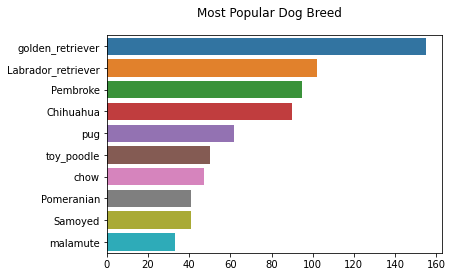

In [118]:
#lets plot this and see 
dog_breeds = Twitter['dog_breeds'].value_counts()[:10]
sns.barplot(dog_breeds.values, dog_breeds.index)
plt.suptitle('Most Popular Dog Breed')

> The most Popular Dog breed is the `Golden_retrirver`, follwed by `Labrador_retriever` and `Pembroke~

### 2. *Relationship between Favorite Count and Retweet Count*

C:\Users\USER\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


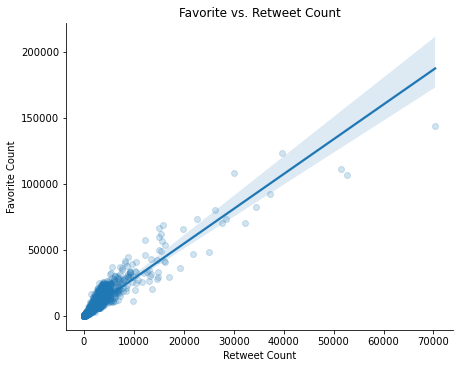

In [119]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=Twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

> Favorite and retweet counts are correlated. The majority of the data falls between 40000 favorites and 10000 retweets.

### 3. *Dog Stage with the Favorite count*

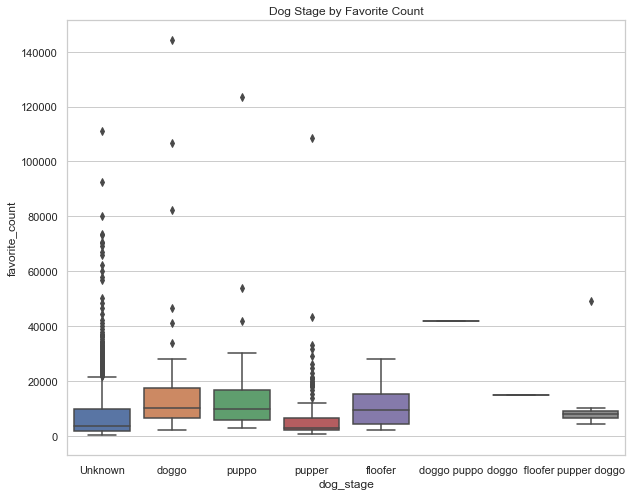

In [120]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.boxplot(x='dog_stage', y="favorite_count", data=Twitter).set_title('Dog Stage by Favorite Count')
plt.savefig('stag_fav.png');

> The Dog_stage with the mosy favorite count is the Doggo